<a href="https://colab.research.google.com/github/rushikeshnaik779/EmployeeSalaryPrediction/blob/main/employeesalary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d pavanelisetty/salarypredictions

mv: cannot stat 'kaggle.json': No such file or directory
salarypredictions.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile 
# 
zip_ref = zipfile.ZipFile("salarypredictions.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
# importing necessary libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


In [ ]:
# loadung train and test dataset as well as train_salaries 
train = pd.read_csv('train_dataset.csv')
train.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [ ]:
train_salaries = pd.read_csv('train_salaries.csv')
train_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [ ]:
new_train = pd.concat([train, train_salaries], axis=1)

In [ ]:
new_train.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,jobId,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,JOB1362684407687,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,JOB1362684407688,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,JOB1362684407689,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,JOB1362684407690,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,JOB1362684407691,163


In [ ]:
# column names 
new_train.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'jobId', 'salary'],
      dtype='object')

In [ ]:
# knowing more about the data like data type, not nulll values, shape 
print(f"Shape for the dataset is {new_train.shape}")

Shape for the dataset is (1000000, 10)


In [ ]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   jobId                1000000 non-null  object
 9   salary               1000000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 76.3+ MB


In [ ]:
# let's see the descriptive stat of the trianing data 
new_train.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [ ]:
# let's see the unique values in the dataset 
new_train.nunique()

jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
jobId                  1000000
salary                     280
dtype: int64

In [ ]:
# let's count the missing values present int hte dataset
new_train.isna().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
jobId                  0
salary                 0
dtype: int64

In [ ]:
# let's remove jobid and company id from the data .. 
# since ids don;t have much relation with tht model we are goiing to build 

In [ ]:
new_train.drop(['jobId', 'companyId'], inplace=True, axis=1)
new_train.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [ ]:
# let's devide the column two numeric and categorical 
numeric_col = ['yearsExperience', 'milesFromMetropolis', 'salary']
cat_col = ['jobType', 'degree', 'major', 'industry']


In [ ]:
# let's seee the relations between numerical columns 
corr = new_train[numeric_col].corr()
corr

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000673,0.375013
milesFromMetropolis,0.000673,1.000000,-0.297666
salary,0.375013,-0.297666,1.000000


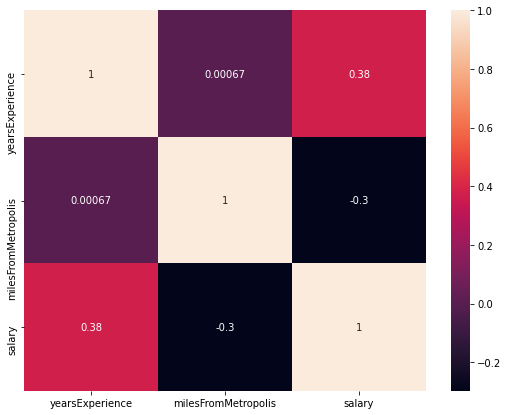

In [ ]:
# ploting beautiful matrix 
plt.subplots(1,1, figsize=(9, 7))
sns.heatmap(corr, annot=True)
plt.show()

## Scatter plot

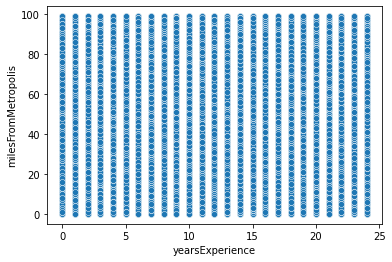

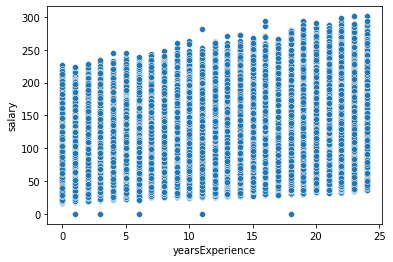

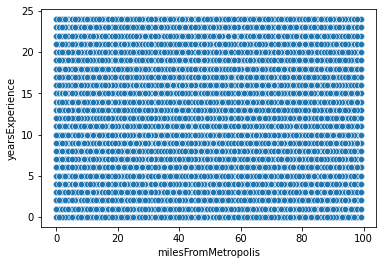

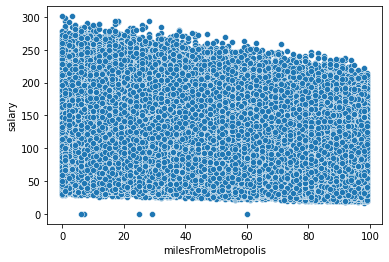

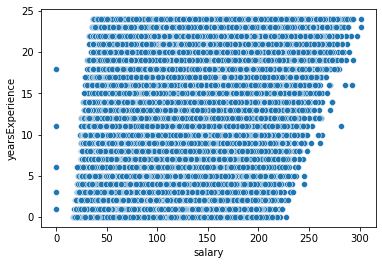

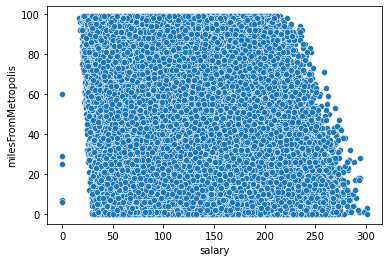

In [ ]:
for i in numeric_col:
    for j in numeric_col:
        if i != j:    
            sns.scatterplot(data=new_train, x =i, y=j )
            plt.show()

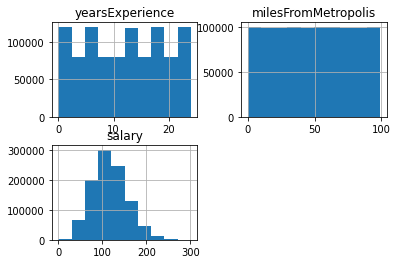

In [ ]:
new_train[numeric_col].hist()
plt.show()

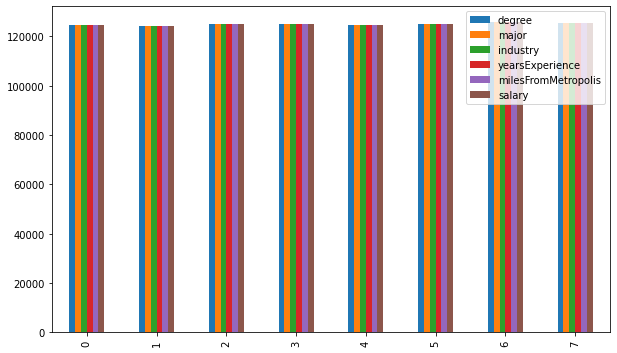

In [ ]:
s = new_train.groupby('jobType').count().reset_index()
fig, ax =  plt.subplots(1,1,figsize=(10, 6))
s.plot(kind='bar', ax=ax)
#ax = ax.set_xlabel(s.jobType)


In [ ]:
s.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CEO,124778,124778,124778,124778,124778,124778
1,CFO,124369,124369,124369,124369,124369,124369
2,CTO,125046,125046,125046,125046,125046,125046
3,JANITOR,124971,124971,124971,124971,124971,124971
4,JUNIOR,124594,124594,124594,124594,124594,124594


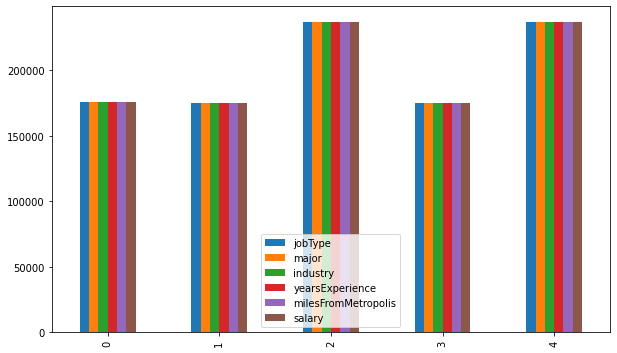

In [ ]:
s = new_train.groupby('degree').count().reset_index()
fig, ax =  plt.subplots(1,1,figsize=(10, 6))
s.plot(kind='bar', ax=ax)


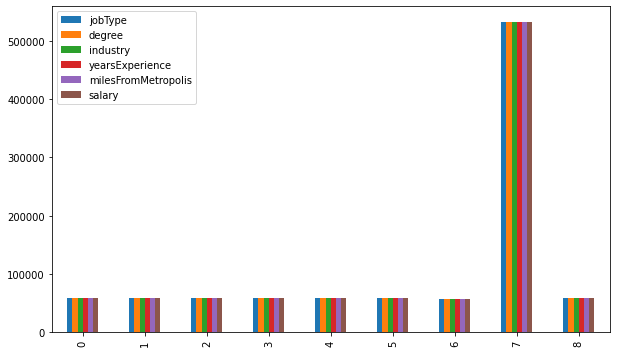

In [ ]:
s = new_train.groupby('major').count().reset_index()
fig, ax =  plt.subplots(1,1,figsize=(10, 6))
s.plot(kind='bar', ax=ax)


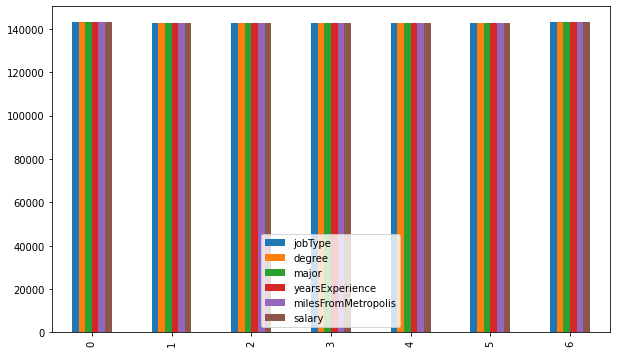

In [ ]:
s = new_train.groupby('industry').count().reset_index()
fig, ax =  plt.subplots(1,1,figsize=(10, 6))
s.plot(kind='bar', ax=ax)


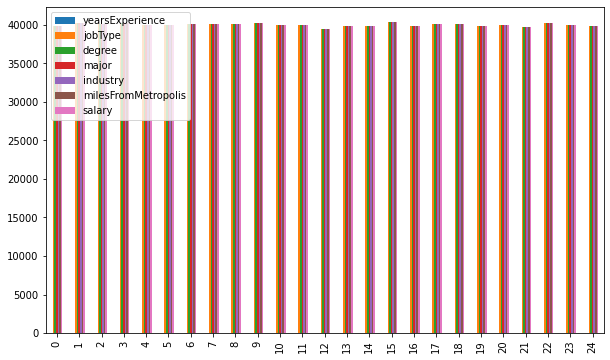

In [ ]:
s = new_train.groupby('yearsExperience').count().reset_index()
fig, ax =  plt.subplots(1,1,figsize=(10, 6))
s.plot(kind='bar', ax=ax)


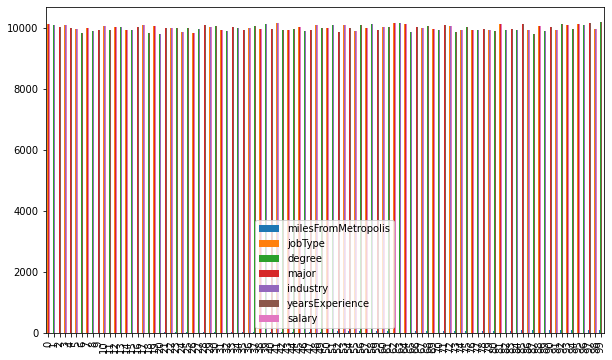

In [ ]:
s = new_train.groupby('milesFromMetropolis').count().reset_index()
fig, ax =  plt.subplots(1,1,figsize=(10, 6))
s.plot(kind='bar', ax=ax)


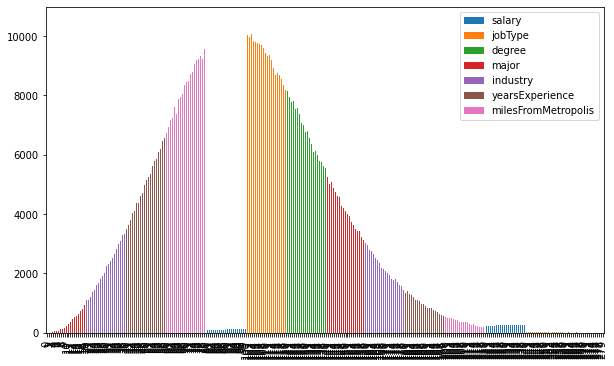

In [ ]:
s = new_train.groupby('salary').count().reset_index()
fig, ax =  plt.subplots(1,1,figsize=(10, 6))
s.plot(kind='bar', ax=ax)


In [ ]:
import statsmodels.api as sm 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# creating a dataframe of just numerical values
train_for_vif = new_train.drop(['jobType', 'degree', 'major', 'industry',
       'salary'],axis=1)

# target values
target = new_train['salary']

# numerical values column names
names = ['yearsExperience','milesFromMetropolis']

names

['yearsExperience', 'milesFromMetropolis']

In [ ]:
train_for_vif.head()

,yearsExperience,milesFromMetropolis
0,10,83
1,3,73
2,10,38
3,8,17
4,8,16


In [ ]:
train_for_vif.columns == names[1]

array([False,  True])

In [ ]:
# Calculating VIF for each feature.
for i in range(0, len(names)):
  y = train_for_vif.loc[:, train_for_vif.columns == names[i]]
  x = train_for_vif.loc[:,train_for_vif.columns != names[i]]
  model = sm.OLS(y, x)
  results = model.fit()
  rsq = results.rsquared
  vif = round(1/(1-rsq),2)
  print("R Square value of {} columns is {} keeping all other columns as features".format(names[i],(round(rsq, 2))))
  print("Variance inflation Factor of {} columns is {} \n".format(names[i], vif))


R Square value of yearsExperience columns is 0.55 keeping all other columns as features
Variance inflation Factor of yearsExperience columns is 2.21 

R Square value of milesFromMetropolis columns is 0.55 keeping all other columns as features
Variance inflation Factor of milesFromMetropolis columns is 2.21 



In [ ]:
# Helper function for scaling all the numerical data using MinMaxScalar
def scale_data(df,col):
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()

  df[col] = scaler.fit_transform(df[col])
  return df

In [ ]:
# Making a list of the column names to be scaled 
col_train = ['yearsExperience','milesFromMetropolis','salary']

# passing data and name for scaling
new_train = scale_data(new_train,col_train)

In [ ]:
new_train.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,0.416667,0.838384,0.431894
1,CEO,HIGH_SCHOOL,NONE,WEB,0.125000,0.737374,0.335548
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,0.416667,0.383838,0.455150
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,0.333333,0.171717,0.471761
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,0.333333,0.161616,0.541528


# Predictive Model Creation 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X, y = pd.get_dummies(new_train.drop('salary', axis=1)), new_train['salary']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)


In [ ]:
print(f"Trainng and testing shape {X_train.shape}, {X_test.shape}, {y_train.shape}, {y_test.shape}")

Trainng and testing shape (700000, 31), (300000, 31), (700000,), (300000,)


In [ ]:
# let's do the model importing and metrics importing here 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
def print_metrics(y_test, y_pred):
    print(f'RSquared\t\t\t{r2_score(y_test, y_pred)}')
    print(f'MeanAbsoluteError\t\t{mean_absolute_error(y_test, y_pred)}')
    print(f'RootMeanSqauredError\t\t{np.sqrt(mean_absolute_error(y_test, y_pred))}')
    print(f'MeanSqauredError\t\t{mean_squared_error(y_test, y_pred)}')
    


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

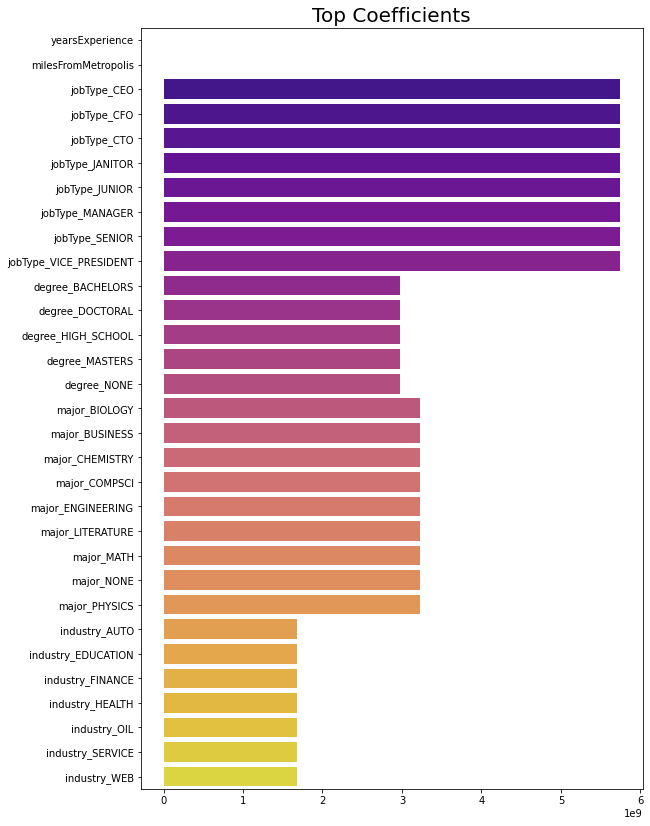

In [ ]:
plt.subplots(1, 1, figsize=(9, 14))
sns.barplot(y=X_train.columns, x=model.coef_, palette="plasma")
plt.title("Top Coefficients", size=20)
plt.show()

In [ ]:
y_pred= model.predict(X_test)

In [ ]:
print_metrics(y_test, y_pred)


RSquared			0.7436008286771799
MeanAbsoluteError		0.05261923260856704
RootMeanSqauredError		0.22938882407076208
MeanSqauredError		0.004244695481901211


## Let's use different models and do the predictions 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import lightgbm as lgbm


In [ ]:
def model_(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print_metrics(y_test, y_pred)
    return model 


In [ ]:
model = model_(DecisionTreeRegressor())

RSquared			0.5375755807158211
MeanAbsoluteError		0.06782225232909703
RootMeanSqauredError		0.2604270575978944
MeanSqauredError		0.007655449247864428


In [ ]:
model = model_(RandomForestRegressor())

RSquared			0.7066500677434212
MeanAbsoluteError		0.05547649489809698
RootMeanSqauredError		0.23553448770423618
MeanSqauredError		0.004856416366875763


In [ ]:
model = model_(KNeighborsRegressor())

In [ ]:
model = model_(XGBRegressor())

In [ ]:
params = {
    "n_estimators": [100, 300 ],
    "max_depth": np.arange(1, 9),
    "min_samples_split":[0.1, 0.4, 0.8],
    "max_features":["sqrt", "log2"],
    "max_samples":[0.3, 0.8]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator=RandomForestRegressor(), param_grid = params, return_train_score=True, cv=5, verbose=1)

In [ ]:
gs.fit(X_train, y_train)